In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
from skimage import img_as_float
from skimage.io import imread
from sklearn.cluster import KMeans
%matplotlib inline

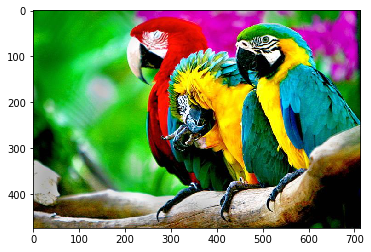

In [23]:
image = imread('parrots.jpg')
pylab.imshow(image)

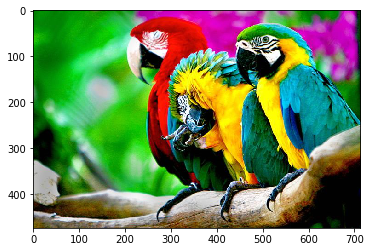

In [24]:
image = img_as_float(image)
pylab.imshow(image)

In [25]:
w, h, d = image.shape
matrix_pixels = pd.DataFrame(np.reshape(image, (w*h, d)), columns=["R", "G", "B"])
matrix_pixels.head()

R         G         B
0  0.015686  0.494118  0.019608
1  0.007843  0.494118  0.007843
2  0.007843  0.494118  0.007843
3  0.007843  0.494118  0.007843
4  0.007843  0.501961  0.011765

In [26]:
def clustering(matrix_pixels, n=8):
    matrix_pixels = matrix_pixels.copy()
    clf = KMeans(n_clusters=n, init="k-means++", random_state=241)
    matrix_pixels["cluster"] = clf.fit_predict(matrix_pixels)
    return matrix_pixels

def means_medians_image(matrix_pixels):
    means = matrix_pixels.groupby("cluster").mean().values
    medians = matrix_pixels.groupby("cluster").median().values
    
    means_matrix_pixels = np.array([means[i] for i in matrix_pixels["cluster"]])
    means_image = np.reshape(means_matrix_pixels, (w, h, d))

    medians_matrix_pixels = np.array([medians[i] for i in matrix_pixels["cluster"]])
    medians_image = np.reshape(medians_matrix_pixels, (w, h, d))
    
    return means_image, medians_image

In [27]:
def psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return 10.0 * np.log10(1.0 / mse)

Clustering:  1


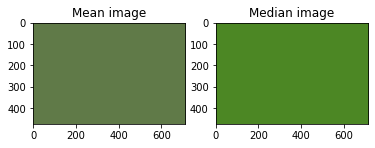

PSNR means: 9.818835544771293, PSNR medians: 9.427840460507397
Clustering:  2


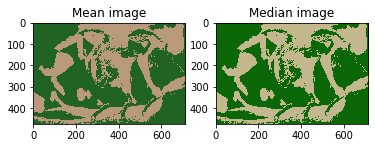

PSNR means: 12.080177084931087, PSNR medians: 11.655077266907849
Clustering:  3


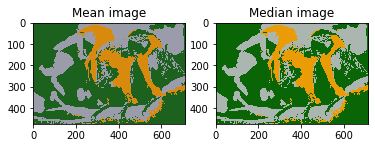

PSNR means: 13.153487044607246, PSNR medians: 12.774948175099809
Clustering:  4


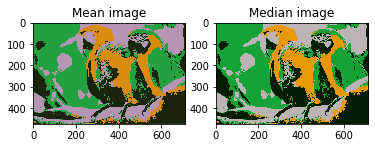

PSNR means: 14.3678179408688, PSNR medians: 14.005928721924676
Clustering:  5


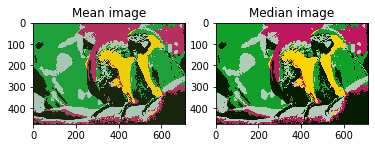

PSNR means: 15.527146197305989, PSNR medians: 15.17790907734613
Clustering:  6


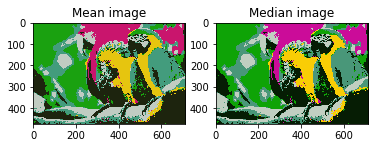

PSNR means: 16.543994096630183, PSNR medians: 16.051176778469276
Clustering:  7


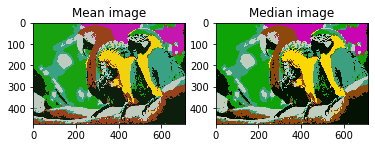

PSNR means: 17.64099250863652, PSNR medians: 17.339368491425024
Clustering:  8


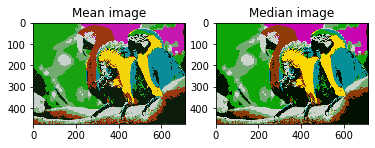

PSNR means: 18.436829014063576, PSNR medians: 18.1379714433961
Clustering:  9


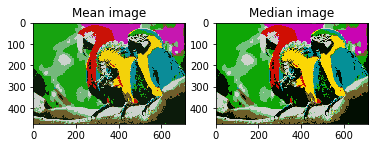

PSNR means: 19.112672735788138, PSNR medians: 18.81388735617062
Clustering:  10


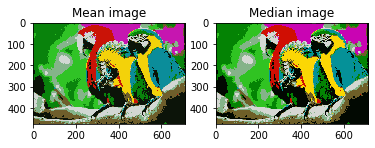

PSNR means: 19.64075663591531, PSNR medians: 19.417472515521055
Clustering:  11


In [ ]:
def draw_io(means_image, medians_image) -> None:
    fig=plt.figure()

    ax = fig.add_subplot(1, 2, 1)
    ax.title.set_text("Mean image")
    pylab.imshow(means_image)

    ax = fig.add_subplot(1, 2, 2)
    ax.title.set_text("Median image")
    pylab.imshow(medians_image)
    
    plt.show()
    
for i in range(1, 21):
    print("Clustering: ", i)
    
    cpixels = clustering(matrix_pixels, i)
    means_image, medians_image = means_medians_image(cpixels)
    draw_io(means_image, medians_image)
    
    psnr_means, psnr_medians = psnr(image, means_image), psnr(image, medians_image)
    print("PSNR means: {0}, PSNR medians: {1}".format(psnr_means, psnr_medians))
    if psnr_means > 20 or psnr_medians > 20:
        print("Clasters: ", i)
        break
